# Assignment1 Part A: FIT5202
### Submitted by : Hitesh Get
### Student ID : 29637333

### Step01 : Import pyspark and initialize Spark

In [1]:
#importing the libraries
import math 
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql.functions import col, udf

In [2]:
import os
# create entry points to spark
from pyspark import SparkContext, SparkConf # Importing sparkcontext and sparkconf
from pyspark.sql import SparkSession # importing sparksession

# We add this line to avoid an error : "Cannot run multiple SparkContexts at once". 
# If there is an existing spark context, we will reuse it instead of creating a new context.
sc = SparkContext.getOrCreate()
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Assignment1")
spark = SparkSession(sparkContext=sc)

### Step 02: Create Resilient Distributed Datasets (RDDs)

In [3]:
# Reading the agile text file in a RDD
agile_rdd = sc.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')
# Reading the scrum text file in a RDD
scrum_rdd = sc.textFile('Scrum Handbook.txt')

In [4]:
# Displaying the data in created RDD
scrum_rdd.collect()

["Jeff Sutherland's ",
 '',
 'Scrum Handbook ',
 '',
 '',
 '',
 '',
 'Everything ',
 'you need ',
 'to know ',
 'to start ',
 '',
 'a Scrum project ',
 'in your ',
 'organization ',
 '',
 'SCRUM ',
 '',
 'TRAINING ',
 '',
 'INSTITUTE ',
 '',
 'm w press ',
 '',
 '',
 '',
 'This book is dedicated to Nobel Laureate Muhammad Yunus and the ',
 'Grameen Bank for originating microenterprise development and the ',
 "Accion International President's Advisory Board, responsible for much of ",
 'microenterprise development in the western hemisphere. ',
 '',
 'The strategy for bootstrapping the poor out of poverty has been ',
 'a model for freeing hundreds of thousands of software developers from ',
 'developer abuse caused by poor management practices. ',
 '',
 'Thanks to the reviewers of the text who include among many others: ',
 '',
 '• Tom Poppendieck ',
 '',
 '• Hen rick Kniberg ',
 '',
 '• Rowan Bunning ',
 '',
 '• Clifford Thompson ',
 '',
 '',
 '',
 'About this book ',
 '',
 'This manual

In [5]:
# Displaying the data in created RDD
agile_rdd.collect()

['LNBIP251 ',
 '',
 '',
 'I Helen Sharp ',
 '',
 'Tracy Hall (Eds.) ',
 '',
 'Agile Processes ',
 'in Software Engineering ',
 'and Extreme Programming ',
 '',
 '17th International Conference, XP 2016 ',
 'Edinburgh, UK, May 24-27,2016 ',
 'Proceedings ',
 '',
 '',
 '4^ Springer Open ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Lecture Notes ',
 '',
 'in Business Information Processing 251 ',
 '',
 '',
 'Series Editors ',
 '',
 'Wil van der Aalst ',
 '',
 'Eindhoven Technical University, Eindhoven, The Netherlands ',
 'John Mylopoulos ',
 '',
 'University of Trento, Povo, Italy ',
 'Michael Rosemann ',
 '',
 'Queensland University of Technology, Brisbane, QLD, Australia ',
 'Michael J. Shaw ',
 '',
 'University of Illinois, Urbana-Champaign, IL, USA ',
 'Clemens Szyperski ',
 '',
 'Microsoft Research, Redmond, WA, USA ',
 '',
 '',
 '',
 'More information about this series at http://www.springer.com/series/7911 ',
 '',
 '',
 '',
 'Helen Sharp • Tracy Hall (Eds.) ',
 '',
 '',
 'Agile Processe

In [6]:
# import re
# patt = re.compile(r'[A-Za-z ]+')
# agile_rdd_filter = agile_rdd.filter(lambda x:  x in patt.split(x))

### Step 03: Cleaning/Manipulating text

In [7]:
# importing regex module
import re
# Creating a function to clean/manipulate text
def cleaning_text(lst):
    # Substituting all non-alphabetic characters with null, then converting them to lower and removing leading and trailing spaces
    lst1 = lst.map(lambda x: re.sub(r"[^a-zA-Z ]+"," ", x))\
    .map(lambda x : x.lower())\
    .map(lambda x : str(x).strip()) 
    return lst1


In [8]:
# Calling the function on agile rdd
agile_clean_text = cleaning_text(agile_rdd)
agile_clean_text.collect()

['lnbip',
 '',
 '',
 'i helen sharp',
 '',
 'tracy hall  eds',
 '',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 '',
 'th international conference  xp',
 'edinburgh  uk  may',
 'proceedings',
 '',
 '',
 'springer open',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'lecture notes',
 '',
 'in business information processing',
 '',
 '',
 'series editors',
 '',
 'wil van der aalst',
 '',
 'eindhoven technical university  eindhoven  the netherlands',
 'john mylopoulos',
 '',
 'university of trento  povo  italy',
 'michael rosemann',
 '',
 'queensland university of technology  brisbane  qld  australia',
 'michael j  shaw',
 '',
 'university of illinois  urbana champaign  il  usa',
 'clemens szyperski',
 '',
 'microsoft research  redmond  wa  usa',
 '',
 '',
 '',
 'more information about this series at http www springer com series',
 '',
 '',
 '',
 'helen sharp   tracy hall  eds',
 '',
 '',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 '',

In [9]:
# Calling the fucntion on scrum file
scrum_clean_text = cleaning_text(scrum_rdd)
scrum_clean_text.collect()

['jeff sutherland s',
 '',
 'scrum handbook',
 '',
 '',
 '',
 '',
 'everything',
 'you need',
 'to know',
 'to start',
 '',
 'a scrum project',
 'in your',
 'organization',
 '',
 'scrum',
 '',
 'training',
 '',
 'institute',
 '',
 'm w press',
 '',
 '',
 '',
 'this book is dedicated to nobel laureate muhammad yunus and the',
 'grameen bank for originating microenterprise development and the',
 'accion international president s advisory board  responsible for much of',
 'microenterprise development in the western hemisphere',
 '',
 'the strategy for bootstrapping the poor out of poverty has been',
 'a model for freeing hundreds of thousands of software developers from',
 'developer abuse caused by poor management practices',
 '',
 'thanks to the reviewers of the text who include among many others',
 '',
 'tom poppendieck',
 '',
 'hen rick kniberg',
 '',
 'rowan bunning',
 '',
 'clifford thompson',
 '',
 '',
 '',
 'about this book',
 '',
 'this manual is based on the scrum papers  publis

In [10]:
#agile_rdd_filter.collect()

In [11]:
#agile_rdd_filter = agile_rdd_filter.map(lambda x : str(x).strip())

In [12]:
#type(agile_rdd_filter)

In [13]:
#agile_rdd_filter.collect()

In [14]:
#agile_rdd_lower = agile_rdd_filter.map(lambda x : x.lower())

In [15]:
#agile_rdd_lower.collect()

### Step 04: Transforming the Data/Counting the words

In [16]:
# Creating a fucntion to calculate word frequency
# 1.Splitting on the basis of spaces
# 2.Filtering the null values
# 3.Creating the tuple of word and 1
# 4.Couting the number of occurences of each word
# 5.Swapping the keys and values
# 6.Sorting the keys in descending order
# 7.Swapping the keys and values again
def word_count(lst):
    lst1 = lst.flatMap(lambda x: x.split(' '))\
    .filter(lambda x: x != '')\
    .map(lambda x : (x,1))\
    .reduceByKey(lambda x,y : x+y)\
    .map(lambda x : (x[1],x[0]))\
    .sortByKey(ascending = False)\
    .map(lambda x : (x[1],x[0]))
    return lst1
    

In [17]:
# Calculating the word frequency for agile rdd
agile_word_frequency = word_count(agile_clean_text)
agile_word_frequency.take(20)

[('the', 8161),
 ('and', 3975),
 ('of', 3954),
 ('to', 3751),
 ('in', 3101),
 ('a', 2755),
 ('is', 1541),
 ('that', 1356),
 ('for', 1195),
 ('on', 1027),
 ('as', 1023),
 ('we', 980),
 ('with', 970),
 ('software', 931),
 ('this', 915),
 ('are', 785),
 ('agile', 784),
 ('it', 775),
 ('development', 748),
 ('was', 711)]

In [18]:
# Calculating the word frequqncy for scrum rdd
scrum_word_frequency = word_count(scrum_clean_text)
scrum_word_frequency.take(20)

[('the', 1238),
 ('of', 538),
 ('and', 534),
 ('to', 478),
 ('a', 454),
 ('scrum', 399),
 ('in', 363),
 ('is', 348),
 ('team', 273),
 ('product', 233),
 ('for', 195),
 ('that', 182),
 ('it', 172),
 ('on', 149),
 ('sprint', 147),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('at', 119),
 ('are', 119)]

In [19]:
#agile_rdd_lower_split.collect()

In [20]:
#agile_rdd_lower_split_new = agile_rdd_lower_split.filter(lambda x: x != '')

In [21]:
#agile_rdd_lower_split_new.collect()

In [22]:
#agile_rdd_lower_count = agile_rdd_lower_split_new.map(lambda x : (x,1))
#agile_rdd_lower_count = agile_rdd_lower_count.reduceByKey(lambda x,y : x+y)

In [23]:
#agile_rdd_lower_count.take(20)

In [24]:
#agile_rdd_lower_count = agile_rdd_lower_count.map(lambda x : (x[1],x[0]))
#agile_rdd_lower_count = agile_rdd_lower_count.sortByKey(ascending = False)

In [25]:
#agile_rdd_lower_count.take(20)

In [26]:
#agile_rdd_split_filter_count_swap = agile_rdd_lower_count.map(lambda x : (x[1],x[0]))
#agile_rdd_split_filter_count_swap.take(20)

### Step 05: Removing Stop Words

In [27]:
# import english stopwords from nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# Creating a function for removing stop words and getting the unique words count
def remove_stop_words(lst):
    lst1 = lst.filter(lambda x: (x[0]) not in stop_words)
    return lst1
    
    

In [28]:
agile_words = remove_stop_words(agile_word_frequency)
agile_words.collect()

[('software', 931),
 ('agile', 784),
 ('development', 748),
 ('team', 592),
 ('work', 461),
 ('product', 459),
 ('project', 372),
 ('teams', 350),
 ('developers', 337),
 ('data', 320),
 ('research', 319),
 ('process', 311),
 ('one', 311),
 ('time', 296),
 ('also', 281),
 ('use', 274),
 ('study', 273),
 ('user', 254),
 ('code', 253),
 ('used', 245),
 ('customer', 233),
 ('scrum', 232),
 ('kanban', 226),
 ('experience', 225),
 ('startups', 222),
 ('challenges', 219),
 ('design', 218),
 ('different', 211),
 ('j', 210),
 ('case', 202),
 ('large', 198),
 ('using', 196),
 ('h', 194),
 ('company', 190),
 ('practices', 180),
 ('license', 180),
 ('e', 179),
 ('projects', 178),
 ('two', 177),
 ('would', 176),
 ('tools', 176),
 ('need', 176),
 ('new', 175),
 ('b', 168),
 ('p', 162),
 ('quality', 161),
 ('first', 157),
 ('questions', 155),
 ('role', 155),
 ('engineering', 154),
 ('xp', 152),
 ('learning', 152),
 ('c', 152),
 ('pp', 150),
 ('change', 147),
 ('creative', 146),
 ('ux', 146),
 ('worki

In [29]:
scrum_words = remove_stop_words(scrum_word_frequency)
scrum_words.collect()

[('scrum', 399),
 ('team', 273),
 ('product', 233),
 ('sprint', 147),
 ('development', 98),
 ('project', 93),
 ('owner', 89),
 ('teams', 86),
 ('work', 79),
 ('backlog', 74),
 ('one', 66),
 ('sutherland', 57),
 ('time', 54),
 ('management', 52),
 ('items', 52),
 ('software', 52),
 ('new', 51),
 ('jeff', 49),
 ('release', 45),
 ('meeting', 44),
 ('first', 40),
 ('planning', 35),
 ('two', 35),
 ('handbook', 34),
 ('may', 33),
 ('item', 33),
 ('code', 33),
 ('agile', 32),
 ('daily', 31),
 ('projects', 30),
 ('process', 30),
 ('many', 30),
 ('sprints', 29),
 ('case', 29),
 ('change', 28),
 ('better', 28),
 ('people', 28),
 ('distributed', 28),
 ('sirsidynix', 27),
 ('end', 27),
 ('tasks', 27),
 ('scrummaster', 26),
 ('much', 26),
 ('list', 26),
 ('practices', 25),
 ('requirements', 25),
 ('done', 25),
 ('scrums', 25),
 ('working', 24),
 ('review', 24),
 ('developers', 23),
 ('used', 23),
 ('members', 23),
 ('complete', 23),
 ('next', 23),
 ('also', 22),
 ('organization', 21),
 ('every', 21

In [30]:
# Getting the agile unique word count
agile_unique_word_count = remove_stop_words(agile_word_frequency).map(lambda x : tuple(x)).keys().distinct().count()
agile_unique_word_count

8962

In [31]:
# Getting the scrum unique word count
scrum_unique_word_count = remove_stop_words(scrum_word_frequency).map(lambda x : tuple(x)).keys().distinct().count()
scrum_unique_word_count

2857

In [32]:
# Total word Count Agile
agile_total_words = remove_stop_words(agile_word_frequency).map(lambda x : tuple(x)).values().sum()
agile_total_words

80978

In [33]:
# Total word count Scrum
scrum_total_words = remove_stop_words(scrum_word_frequency).map(lambda x : tuple(x)).values().sum()
scrum_total_words

10937

### Step 06: Find the average occurrence of a word

In [34]:
# Agile Average word count
Agile_average_word_count = agile_total_words/agile_unique_word_count
Agile_average_word_count

9.035706315554563

In [35]:
# Scrum Average word count
scrum_average_word_count = scrum_total_words/scrum_unique_word_count
scrum_average_word_count

3.8281414070703534

### Step 7 : Exploratory data analysis

#### Compare the distribution of words in Book1 and Book2.

In [36]:
# Create a data frame for  words and their count
df_agile = agile_words.toDF(['uniq_words','word_count'])

In [37]:
# Cast the word count to integer type
df_agile = df_agile.withColumn("word_count", df_agile["word_count"].cast(IntegerType()))

In [38]:
# Use udf to created logfield
field_log = udf(lambda x: float(x))
df_agile = df_agile.withColumn("log_count",field_log(df_agile['word_count']))
# Create a column logcount using the log_field function
df_agile = df_agile.withColumn("log_count", df_agile["word_count"].cast(FloatType()))
logcount_df = df_agile.select('log_count').collect()

In [39]:
# Create a variable to store logcount
word_pattern_agile = [row['log_count'] for row in logcount_df ]

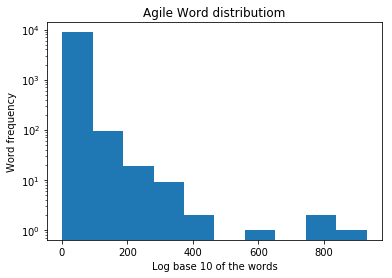

In [40]:
# Plot the histogram
min_val = min(word_pattern_agile)
max_val = max(word_pattern_agile)
plt.hist(word_pattern_agile, bins = 10, range = (min_val, max_val))
plt.title('Agile Word distributiom')
plt.xlabel('Log base 10 of the words')
plt.ylabel('Word frequency')
plt.yscale('log')
plt.show()

In [41]:
# Create a data frame for  words and their count
df_scrum = scrum_words.toDF(['uniq_words','word_count'])

In [42]:
# Cast the word count to integer type
df_scrum = df_scrum.withColumn("word_count", df_scrum["word_count"].cast(IntegerType()))

In [43]:
# Use udf to created logfield
field_log = udf(lambda x: float(math.log(x)))
# Create a column logcount using the log_field function
df_scrum = df_scrum.withColumn("log_count",field_log(df_scrum['word_count']))
df_scrum = df_scrum.withColumn("log_count", df_scrum["word_count"].cast(FloatType()))
logcount_df_scrum = df_scrum.select('log_count').collect()

In [44]:
# Create a variable to store logcount
word_pattern_scrum = [row['log_count'] for row in logcount_df_scrum ]

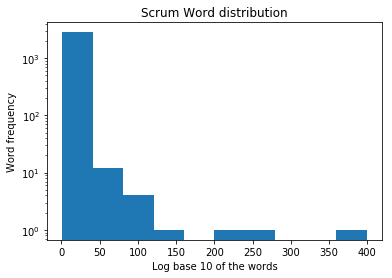

In [45]:
# Plot the histogram
min_val_scrum = min(word_pattern_scrum)
max_val_scrum = max(word_pattern_scrum)
plt.hist(word_pattern_scrum, bins = 10, range = (min_val_scrum, max_val_scrum))
plt.title('Scrum Word distribution')
plt.xlabel('Log base 10 of the words')
plt.ylabel('Word frequency')
plt.yscale('log')
plt.show()

By looking at the graph distribution for both agile and scrum, we can see that there are few words which have occured multiple number of times which could be the usual english words also there are words which are context based but have occured for very few number of times.

#### Compare the top 15 most common words in Book1 and Book2

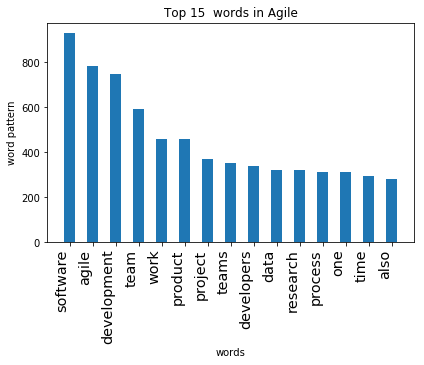

In [46]:
# Create dataframe for agile and scrum files for their words and count
df_agile= agile_words.toDF(['words','count'])
# Take top 15 words
df_agile = df_agile.take(15)
# Take top 15 words
df_scrum= scrum_words.toDF(['words','count'])
df_scrum = df_scrum.take(15)

# Plot the graph for Agile
count = [row['count'] for row in df_agile ]
words = [row['words'] for row in df_agile ] 
bar_width = 0.5
index = np.arange(len(words))
plt.bar(index, count, bar_width, align='center')
plt.xticks(index,words)
plt.xlabel('words')
plt.ylabel('word pattern')
plt.title('Top 15  words in Agile')
plt.tight_layout()
plt.xticks( rotation=90,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show()

As per the graph here we can see that agile is more based on the software development cycle methodology.

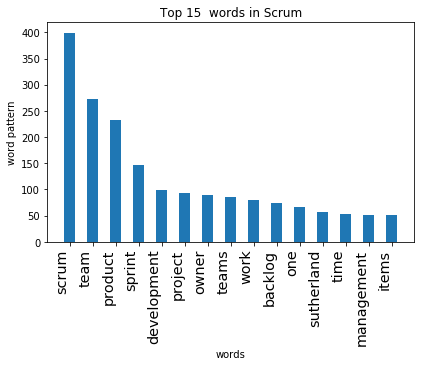

In [47]:
# plot the graph for Scrum
count_scrum = [row['count'] for row in df_scrum ]
words_scrum = [row['words'] for row in df_scrum ] 
bar_width = 0.5
index = np.arange(len(words_scrum))
plt.bar(index, count_scrum, bar_width, align='center')
plt.xticks(index,words_scrum)
plt.xlabel('words')
plt.ylabel('word pattern')
plt.title('Top 15  words in Scrum')
plt.tight_layout()
plt.xticks( rotation=90,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show()

Here based on the graph we can see that Scrum is more like based a project development which includes multiple sprints related to the project and the detailed record of the progress of the project.